# Libraries

In [1]:
import pandas as pd
import numpy as np
import sklearn

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import make_column_transformer

from imblearn.over_sampling import *
from imblearn.under_sampling import *

from sklearn.utils import *
from sklearn.model_selection import train_test_split
from platform import python_version

from sklearn.tree import export_graphviz
import graphviz

# Importing the dataset 

In [2]:
df = pd.read_csv(r"C:\Users\matth\0_BDMP\BDMP\0_BDMP\matthews_really_final_cleaned.csv")
df.head()

,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,...,STREET_DIRECTION,STREET_NAME,MOST_SEVERE_INJURY,INJURIES_TOTAL,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,CRASH_YEAR
0,2019-03-25,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,STRAIGHT AND LEVEL,DRY,...,W,RANDOLPH ST,"REPORTED, NOT EVIDENT",1.0,14,2,3,41.884547,-87.641201,2019
1,2018-09-05,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,...,N,ELSTON AVE,NO INDICATION OF INJURY,0.0,8,4,9,41.968562,-87.740659,2018
2,2022-07-15,30,UNKNOWN,UNKNOWN,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,...,N,CENTRAL PARK AVE,NO INDICATION OF INJURY,0.0,0,6,7,41.886336,-87.716203,2022
3,2022-07-15,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,...,N,ASHLAND AVE,NO INDICATION OF INJURY,0.0,18,6,7,41.925111,-87.667997,2022
4,2018-06-03,30,NO CONTROLS,NO CONTROLS,CLEAR,UNKNOWN,PARKED MOTOR VEHICLE,ONE-WAY,STRAIGHT AND LEVEL,DRY,...,N,KEELER AVE,NO INDICATION OF INJURY,0.0,17,1,6,41.910758,-87.731389,2018


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732569 entries, 0 to 732568
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   CRASH_DATE               732569 non-null  object 
 1   POSTED_SPEED_LIMIT       732569 non-null  int64  
 2   TRAFFIC_CONTROL_DEVICE   732569 non-null  object 
 3   DEVICE_CONDITION         732569 non-null  object 
 4   WEATHER_CONDITION        732569 non-null  object 
 5   LIGHTING_CONDITION       732569 non-null  object 
 6   FIRST_CRASH_TYPE         732569 non-null  object 
 7   TRAFFICWAY_TYPE          732569 non-null  object 
 8   ALIGNMENT                732569 non-null  object 
 9   ROADWAY_SURFACE_COND     732569 non-null  object 
 10  ROAD_DEFECT              732569 non-null  object 
 11  CRASH_TYPE               732569 non-null  object 
 12  DAMAGE                   732569 non-null  object 
 13  PRIM_CONTRIBUTORY_CAUSE  732569 non-null  object 
 14  STRE

## Revising the Target Variable Distribution

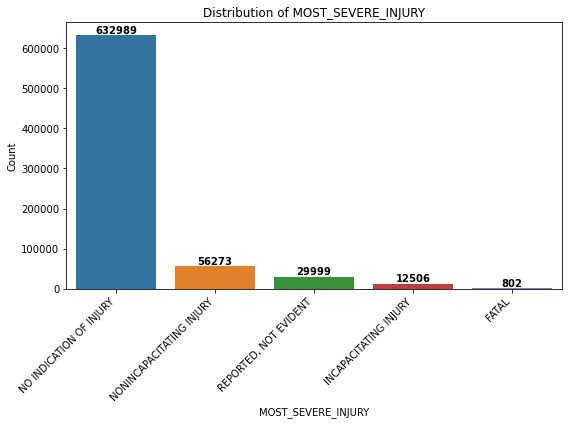

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df

# Count the occurrences of each unique value in the 'MOST_SEVERE_INJURY' column
severity_counts = df['MOST_SEVERE_INJURY'].value_counts()

# Calculate the percentage of each unique value in the 'MOST_SEVERE_INJURY' column
severity_percentage = df['MOST_SEVERE_INJURY'].value_counts(normalize=True) * 100

# Combine the counts and percentages into a DataFrame for visualization
severity_distribution = pd.DataFrame({
    'Count': severity_counts,
    'Percentage': severity_percentage
})

# Plot the bar plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=severity_distribution.index, y='Count', data=severity_distribution)
plt.xticks(rotation=45, ha='right')
plt.xlabel('MOST_SEVERE_INJURY')
plt.ylabel('Count')
plt.title('Distribution of MOST_SEVERE_INJURY')

# Adding data labels above each bar
for index, value in enumerate(severity_distribution['Count']):
    plt.text(index, value, str(value), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()


# Feature Engineering

In [5]:
df.shape

(732569, 25)

In [6]:
# Columns related to environmental conditions (potential predictors)
feature_names = [
    'POSTED_SPEED_LIMIT',
    'TRAFFIC_CONTROL_DEVICE',
    'DEVICE_CONDITION',
    'WEATHER_CONDITION',
    'LIGHTING_CONDITION',
    'FIRST_CRASH_TYPE',
    'TRAFFICWAY_TYPE',
    'ALIGNMENT',
    'ROADWAY_SURFACE_COND',
    'ROAD_DEFECT',
    'DAMAGE',
    'PRIM_CONTRIBUTORY_CAUSE',
    'CRASH_HOUR',
    'CRASH_DAY_OF_WEEK',
    'CRASH_MONTH',
    'LATITUDE',
    'LONGITUDE',
    'CRASH_YEAR'
]

# Target feature (severity of incidents)
target_feature = 'MOST_SEVERE_INJURY'


In [7]:
# Use one-hot encoding to convert categorical columns into numerical representations
encoded_df = pd.get_dummies(df, columns=[
    'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION',
    'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'ALIGNMENT',
    'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'DAMAGE', 'PRIM_CONTRIBUTORY_CAUSE'
])

# Make sure the column names match the feature names after one-hot encoding
encoded_feature_names = encoded_df.columns.tolist()

# Select only the features in the original feature_names list
selected_encoded_features = [feature for feature in encoded_feature_names if feature in feature_names]

# Select the features and target variable
X = encoded_df[selected_encoded_features]
y = df[target_feature]


# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Drop any non-numeric or non-essential columns before scaling
X_train_numeric = X_train.select_dtypes(include=['float64', 'int64'])
X_test_numeric = X_test.select_dtypes(include=['float64', 'int64'])

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numeric)
X_test_scaled = scaler.transform(X_test_numeric)



# Handling Imbalanced Target Variable Classes

In [8]:
from sklearn.preprocessing import LabelEncoder
# Handling Imbalanced Classes with RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train_scaled, y_train)


# Convert the target feature to numeric format using label encoding for training data
label_encoder = LabelEncoder()
y_train_numeric = label_encoder.fit_transform(y_train)
y_resampled_numeric = label_encoder.transform(y_resampled)

# Count the occurrences of each injury severity category in the original dataset
injury_severity_counts_original = pd.Series(y_train_numeric).value_counts()

# Count the occurrences of each injury severity category in the resampled dataset
injury_severity_counts_resampled = pd.Series(y_resampled_numeric).value_counts()

# Calculate the percentage of each injury severity category in the original dataset
injury_severity_percentage_original = (injury_severity_counts_original / len(y_train_numeric)) * 100

# Calculate the percentage of each injury severity category in the resampled dataset
injury_severity_percentage_resampled = (injury_severity_counts_resampled / len(y_resampled_numeric)) * 100


In [9]:
# Display the results for training data
print('Training Data:')
print('--------------')
print('X and y shapes:')
print(X_resampled.shape, y_resampled.shape, '\n')
print('Target Ratio (Original):')
print(injury_severity_percentage_original, '\n')
print('Target Ratio (Resampled):')
print(injury_severity_percentage_resampled, '\n')


Training Data:
--------------
X and y shapes:
(2533735, 7) (2533735,) 

Target Ratio (Original):
2    86.467482
3     7.633243
4     4.086818
1     1.703082
0     0.109375
dtype: float64 

Target Ratio (Resampled):
2    20.0
3    20.0
4    20.0
1    20.0
0    20.0
dtype: float64 



In [10]:

# Handling Imbalanced Classes with RandomOverSampler for Testing Data
ros = RandomOverSampler(random_state=42)
X_resampled_test, y_resampled_test = ros.fit_resample(X_test_scaled, y_test)

# Convert the target feature to numeric format using label encoding for testing data
y_test_numeric = label_encoder.transform(y_test)
y_resampled_test_numeric = label_encoder.transform(y_resampled_test)

# Count the occurrences of each injury severity category in the original testing dataset
injury_severity_counts_original_test = pd.Series(y_test_numeric).value_counts()

# Count the occurrences of each injury severity category in the resampled testing dataset
injury_severity_counts_resampled_test = pd.Series(y_resampled_test_numeric).value_counts()

# Calculate the percentage of each injury severity category in the original testing dataset
injury_severity_percentage_original_test = (injury_severity_counts_original_test / len(y_test_numeric)) * 100

# Calculate the percentage of each injury severity category in the resampled testing dataset
injury_severity_percentage_resampled_test = (injury_severity_counts_resampled_test / len(y_resampled_test_numeric)) * 100


In [11]:
# Display the results for testing data
print('Testing Data:')
print('--------------')
print('X and y shapes:')
print(X_resampled_test.shape, y_resampled_test.shape, '\n')
print('Target Ratio (Original) - Testing Data:')
print(injury_severity_percentage_original_test, '\n')
print('Target Ratio (Resampled) - Testing Data:')
print(injury_severity_percentage_resampled_test, '\n')

Testing Data:
--------------
X and y shapes:
(631210, 7) (631210,) 

Target Ratio (Original) - Testing Data:
2    86.163780
3     7.875015
4     4.127933
1     1.723385
0     0.109887
dtype: float64 

Target Ratio (Resampled) - Testing Data:
2    20.0
3    20.0
4    20.0
0    20.0
1    20.0
dtype: float64 



## Checking the features used

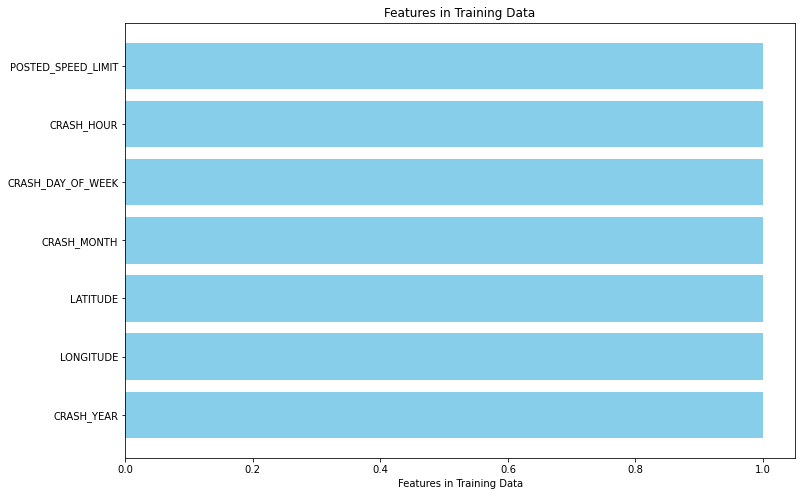

In [12]:
import matplotlib.pyplot as plt

# Create a bar plot to visualize the features in the training dataset
plt.figure(figsize=(12, 8))
plt.barh(range(len(X_train.columns)), [1] * len(X_train.columns), align='center', color='skyblue')
plt.yticks(range(len(X_train.columns)), X_train.columns)
plt.xlabel("Features in Training Data")
plt.title("Features in Training Data")
plt.gca().invert_yaxis()
plt.show()


# Temporary

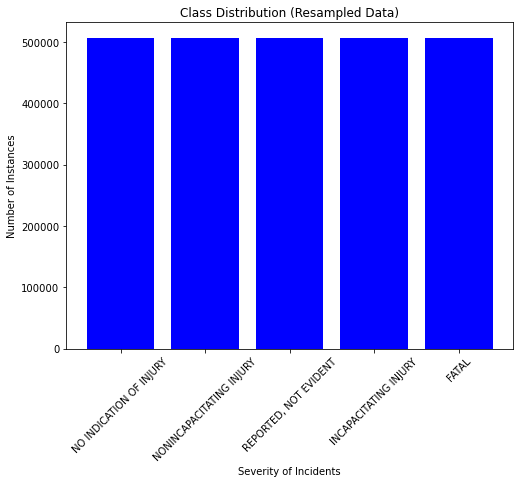

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
import matplotlib.pyplot as plt

# Columns related to environmental conditions (potential predictors)
get_feature_names_out = [
    'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION',
    'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE',
    'TRAFFICWAY_TYPE', 'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT',
    'DAMAGE', 'PRIM_CONTRIBUTORY_CAUSE', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK',
    'CRASH_MONTH', 'LATITUDE', 'LONGITUDE', 'CRASH_YEAR'
]

# Target feature (severity of incidents)
target_feature = 'MOST_SEVERE_INJURY'

# Load your dataset (assuming you have it loaded as 'df')

# Select the features and target variable
X = df[get_feature_names_out]
y = df[target_feature]

# Split numerical and categorical features
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# One-hot encode categorical features
encoder = OneHotEncoder(drop='first', sparse=False)
X_categorical_encoded = encoder.fit_transform(X[categorical_features])

# Combine encoded categorical features with numerical features
X_encoded = pd.concat([X[numeric_features], pd.DataFrame(X_categorical_encoded, columns=encoder.get_feature_names_out(categorical_features))], axis=1)

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Perform data balancing using RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# Display class distribution for resampled data
class_distribution_resampled = y_resampled.value_counts()
plt.figure(figsize=(8, 6))
plt.bar(class_distribution_resampled.index, class_distribution_resampled.values, color='blue')
plt.xlabel('Severity of Incidents')
plt.ylabel('Number of Instances')
plt.title('Class Distribution (Resampled Data)')
plt.xticks(rotation=45)
plt.show()


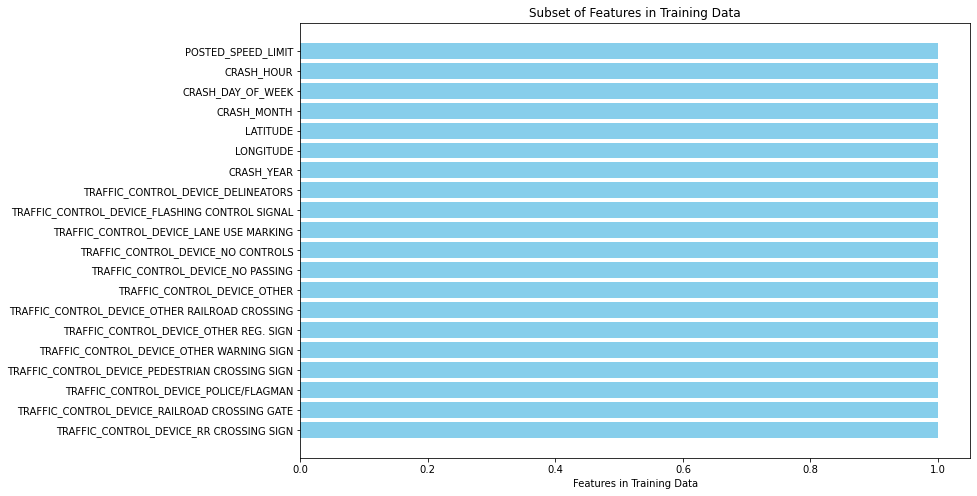

Unique Features in X_train:
POSTED_SPEED_LIMIT
CRASH_HOUR
CRASH_DAY_OF_WEEK
CRASH_MONTH
LATITUDE
LONGITUDE
CRASH_YEAR
TRAFFIC_CONTROL_DEVICE_DELINEATORS
TRAFFIC_CONTROL_DEVICE_FLASHING CONTROL SIGNAL
TRAFFIC_CONTROL_DEVICE_LANE USE MARKING
TRAFFIC_CONTROL_DEVICE_NO CONTROLS
TRAFFIC_CONTROL_DEVICE_NO PASSING
TRAFFIC_CONTROL_DEVICE_OTHER
TRAFFIC_CONTROL_DEVICE_OTHER RAILROAD CROSSING
TRAFFIC_CONTROL_DEVICE_OTHER REG. SIGN
TRAFFIC_CONTROL_DEVICE_OTHER WARNING SIGN
TRAFFIC_CONTROL_DEVICE_PEDESTRIAN CROSSING SIGN
TRAFFIC_CONTROL_DEVICE_POLICE/FLAGMAN
TRAFFIC_CONTROL_DEVICE_RAILROAD CROSSING GATE
TRAFFIC_CONTROL_DEVICE_RR CROSSING SIGN
TRAFFIC_CONTROL_DEVICE_SCHOOL ZONE
TRAFFIC_CONTROL_DEVICE_STOP SIGN/FLASHER
TRAFFIC_CONTROL_DEVICE_TRAFFIC SIGNAL
TRAFFIC_CONTROL_DEVICE_UNKNOWN
TRAFFIC_CONTROL_DEVICE_YIELD
DEVICE_CONDITION_FUNCTIONING PROPERLY
DEVICE_CONDITION_MISSING
DEVICE_CONDITION_NO CONTROLS
DEVICE_CONDITION_NOT FUNCTIONING
DEVICE_CONDITION_OTHER
DEVICE_CONDITION_UNKNOWN
DEVICE_CONDITIO

In [11]:
import matplotlib.pyplot as plt

# Create a bar plot to visualize a subset of features in the training dataset
subset_features = X_train.columns[:20]  # Change the number to display a different subset
plt.figure(figsize=(12, 8))
plt.barh(range(len(subset_features)), [1] * len(subset_features), align='center', color='skyblue')
plt.yticks(range(len(subset_features)), subset_features)
plt.xlabel("Features in Training Data")
plt.title("Subset of Features in Training Data")
plt.gca().invert_yaxis()
plt.show()

unique_features = X_train.columns.tolist()
print("Unique Features in X_train:")
for feature in unique_features:
    print(feature)


# Models

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Initialize the logistic regression model
logreg = LogisticRegression(random_state=42)

# Fit the model on the resampled training data
logreg.fit(X_resampled, y_resampled)

# Scale the numeric features of the test data
X_test_numeric = X_test.select_dtypes(include=['float64', 'int64'])
scaler = StandardScaler()
X_test_scaled_numeric = scaler.fit_transform(X_test_numeric)

# Make predictions on the scaled test data
logreg_predictions = logreg.predict(X_test_scaled_numeric)

# Calculate accuracy
logreg_accuracy = accuracy_score(y_test, logreg_predictions)

print("Logistic Regression Accuracy:", logreg_accuracy)


## KNN

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Train a KNN model
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
knn.fit(X_train_scaled, y_train)
knn_predictions = knn.predict(X_test_scaled)

# Calculate evaluation metrics for KNN
knn_accuracy = accuracy_score(y_test, knn_predictions)
knn_precision = precision_score(y_test, knn_predictions, average='weighted')
knn_recall = recall_score(y_test, knn_predictions, average='weighted')
knn_f1 = f1_score(y_test, knn_predictions, average='weighted')

print("K-Nearest Neighbors Results:")
print(f"Accuracy: {knn_accuracy:.2f}")
print(f"Precision: {knn_precision:.2f}")
print(f"Recall: {knn_recall:.2f}")
print(f"F1 Score: {knn_f1:.2f}")


C:\Users\matth\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


K-Nearest Neighbors Results:
Accuracy: 0.93
Precision: 0.92
Recall: 0.93
F1 Score: 0.92


## Decision Tree

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have already split and preprocessed your data, including scaling the features (X_train_scaled and X_test_scaled)
# and obtaining the target variables (y_train and y_test).

# Train a Decision Tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)
dt_predictions = dt.predict(X_test_scaled)

# Calculate evaluation metrics for Decision Tree model
dt_accuracy = accuracy_score(y_test, dt_predictions)
dt_precision = precision_score(y_test, dt_predictions, average='weighted')
dt_recall = recall_score(y_test, dt_predictions, average='weighted')
dt_f1 = f1_score(y_test, dt_predictions, average='weighted')

print("Decision Tree Results:")
print(f"Accuracy: {dt_accuracy:.2f}")
print(f"Precision: {dt_precision:.2f}")
print(f"Recall: {dt_recall:.2f}")
print(f"F1 Score: {dt_f1:.2f}")


Decision Tree Results:
Accuracy: 0.92
Precision: 0.92
Recall: 0.92
F1 Score: 0.92


## Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have already split and preprocessed your data, including scaling the features (X_train_scaled and X_test_scaled)
# and obtaining the target variables (y_train and y_test).

# Train a Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)
rf_predictions = rf.predict(X_test_scaled)

# Calculate evaluation metrics for Random Forest model
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions, average='weighted')
rf_recall = recall_score(y_test, rf_predictions, average='weighted')
rf_f1 = f1_score(y_test, rf_predictions, average='weighted')

print("Random Forest Results:")
print(f"Accuracy: {rf_accuracy:.2f}")
print(f"Precision: {rf_precision:.2f}")
print(f"Recall: {rf_recall:.2f}")
print(f"F1 Score: {rf_f1:.2f}")


Random Forest Results:
Accuracy: 0.94
Precision: 0.93
Recall: 0.94
F1 Score: 0.93


In [49]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create an XGBoost classifier
xgb_classifier = XGBClassifier()

# Fit the classifier to the training data
xgb_classifier.fit(X_train_scaled, y_train_numeric)  # Assuming X_train_scaled and y_train_numeric

# Make predictions on the test data
xgb_predictions = xgb_classifier.predict(X_test_scaled)  # Assuming X_test_scaled

# Calculate accuracy
xgb_accuracy = accuracy_score(y_test_numeric, xgb_predictions)  # Assuming y_test_numeric

# Print the accuracy
print("XGBoost Accuracy:", xgb_accuracy)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test_numeric, xgb_predictions))  # Assuming y_test_numeric

# Print the classification report
print("Classification Report:")
print(classification_report(y_test_numeric, xgb_predictions))  # Assuming y_test_numeric


XGBoost Accuracy: 0.9406609607273025
Confusion Matrix:
[[     0      0      0    159      2]
 [     2      9      0   2436     78]
 [     0      0 126242      0      0]
 [     1     17      0  11177    343]
 [     1      9      0   5646    392]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       161
           1       0.26      0.00      0.01      2525
           2       1.00      1.00      1.00    126242
           3       0.58      0.97      0.72     11538
           4       0.48      0.06      0.11      6048

    accuracy                           0.94    146514
   macro avg       0.46      0.41      0.37    146514
weighted avg       0.93      0.94      0.92    146514



## Bayesian Optimization

C:\Users\matth\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[17:02:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "scale_pos_weight" } are not used.



C:\Users\matth\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\matth\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       161
           1       0.17      0.03      0.06      2525
           2       1.00      1.00      1.00    126242
           3       0.58      0.81      0.68     11538
           4       0.36      0.21      0.27      6048

    accuracy                           0.93    146514
   macro avg       0.42      0.41      0.40    146514
weighted avg       0.93      0.93      0.93    146514



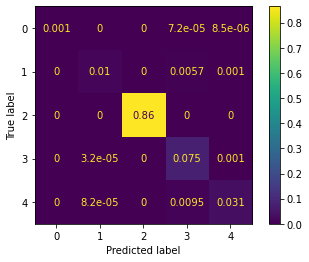

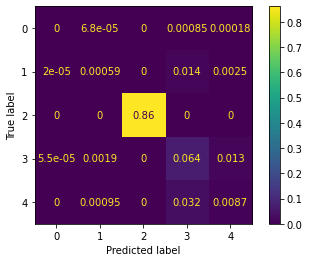

In [51]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, plot_confusion_matrix

# Define the hyperparameters based on the provided values
params = {
    'colsample_bytree': 0.5802155452308511,
    'gamma': 0.29764960799687223,
    'learning_rate': 0.47464750071745865,
    'max_depth': 11,
    'min_child_weight': 5.565853600455331,
    'n_estimators': 308,
}

# Create an XGBoost classifier with the specified hyperparameters
xgb_opt1 = XGBClassifier(**params, use_label_encoder=False).fit(X_train_scaled, y_train_numeric)  # Assuming X_train_scaled and y_train_numeric

# Plot confusion matrix for training data
plot_confusion_matrix(xgb_opt1, X_train_scaled, y_train_numeric, normalize='all')

# Plot confusion matrix for testing data
plot_confusion_matrix(xgb_opt1, X_test_scaled, y_test_numeric, normalize='all')

# Make predictions on the test data
y_pred = xgb_opt1.predict(X_test_scaled)  # Assuming X_test_scaled

# Print classification report
print(classification_report(y_test_numeric, y_pred))  # Assuming y_test_numeric


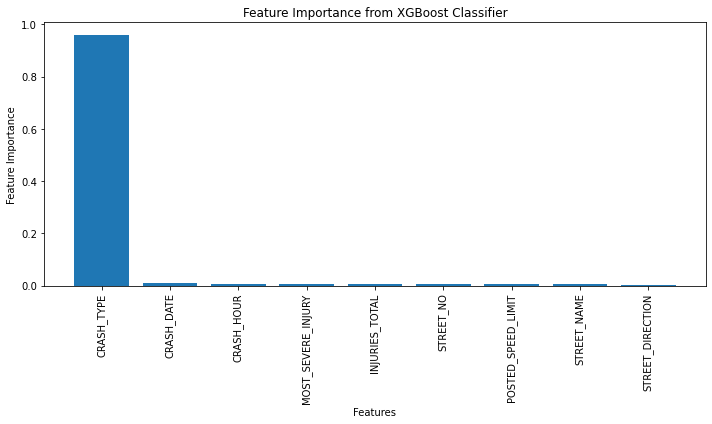

In [53]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances from the trained XGBoost classifier
feature_importances = xgb_opt1.feature_importances_

# Get the names of the features
feature_names = np.array(feature_names)

# Sort feature importances in descending order
sorted_idx = np.argsort(feature_importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances[sorted_idx])
plt.xticks(range(len(feature_importances)), feature_names[sorted_idx], rotation=90)
plt.xlabel("Features")
plt.ylabel("Feature Importance")
plt.title("Feature Importance from XGBoost Classifier")
plt.tight_layout()
plt.show()


# Hyperparameter Tuning

## Grid Search

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Create a Logistic Regression model
lr = LogisticRegression(random_state=42)

# Define the hyperparameter grid to search
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Perform GridSearchCV
grid_search_lr = GridSearchCV(lr, param_grid_lr, cv=5, scoring='accuracy')
grid_search_lr.fit(X_train_scaled, y_train)

# Print the best hyperparameters and the corresponding accuracy score
print("Best Hyperparameters for Logistic Regression:", grid_search_lr.best_params_)
print("Best Accuracy Score for Logistic Regression:", grid_search_lr.best_score_)


C:\Users\matth\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\matth\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\matth\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\matth\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\matth\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\matth\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

C:\Users\matth\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\matth\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\matth\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best Hyperparameters for Logistic Regression: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
Best Accuracy Score for Logistic Regression: 0.9410072433474674


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Create a Decision Tree model
dt = DecisionTreeClassifier(random_state=42)

# Define the hyperparameter grid to search
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV
grid_search_dt = GridSearchCV(dt, param_grid_dt, cv=5, scoring='accuracy')
grid_search_dt.fit(X_train_scaled, y_train)

# Print the best hyperparameters and the corresponding accuracy score
print("Best Hyperparameters for Decision Tree:", grid_search_dt.best_params_)
print("Best Accuracy Score for Decision Tree:", grid_search_dt.best_score_)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Create a Random Forest model
rf = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid to search
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train_scaled, y_train)

# Print the best hyperparameters and the corresponding accuracy score
print("Best Hyperparameters for Random Forest:", grid_search_rf.best_params_)
print("Best Accuracy Score for Random Forest:", grid_search_rf.best_score_)


## Random Search

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Define the hyperparameter search space for LR
param_dist_lr = {
    'C': uniform(0.01, 10),  # Regularization parameter C
    'penalty': ['l1', 'l2'],  # Regularization type (L1 or L2)
    'solver': ['liblinear', 'saga'],  # Solver for optimization
    'max_iter': [100, 200, 300]  # Maximum number of iterations
}

# Initialize the LR model
lr = LogisticRegression(random_state=42)

# Initialize Randomized Search with cross-validation
random_search_lr = RandomizedSearchCV(lr, param_distributions=param_dist_lr, n_iter=10, cv=5, random_state=42)

# Fit the Randomized Search on your data
random_search_lr.fit(X_train_scaled, y_train)

# Get the best hyperparameters and the best model
best_params_lr = random_search_lr.best_params_
best_model_lr = random_search_lr.best_estimator_


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the hyperparameter search space for DT
param_dist_dt = {
    'max_depth': [None, 10, 20, 30, 40],  # Maximum depth of the tree
    'min_samples_split': randint(2, 20),  # Minimum samples required to split an internal node
    'min_samples_leaf': randint(1, 20),  # Minimum samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider at each split
}

# Initialize the DT model
dt = DecisionTreeClassifier(random_state=42)

# Initialize Randomized Search with cross-validation
random_search_dt = RandomizedSearchCV(dt, param_distributions=param_dist_dt, n_iter=10, cv=5, random_state=42)

# Fit the Randomized Search on your data
random_search_dt.fit(X_train_scaled, y_train)

# Get the best hyperparameters and the best model
best_params_dt = random_search_dt.best_params_
best_model_dt = random_search_dt.best_estimator_


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the hyperparameter search space for RF
param_dist_rf = {
    'n_estimators': randint(100, 1000),  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30, 40],  # Maximum depth of the tree
    'min_samples_split': randint(2, 20),  # Minimum samples required to split an internal node
    'min_samples_leaf': randint(1, 20),  # Minimum samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider at each split
}

# Initialize the RF model
rf = RandomForestClassifier(random_state=42)

# Initialize Randomized Search with cross-validation
random_search_rf = RandomizedSearchCV(rf, param_distributions=param_dist_rf, n_iter=10, cv=5, random_state=42)

# Fit the Randomized Search on your data
random_search_rf.fit(X_train_scaled, y_train)

# Get the best hyperparameters and the best model
best_params_rf = random_search_rf.best_params_
best_model_rf = random_search_rf.best_estimator_


# Feature Importance for the best model

# Feature Selection

# Saving the model

In [ ]:
import pickle

# Save the model to disk
filename = 'best_model.pkl'
pickle.dump(lr, open(filename, 'wb'))

# Model Evaluation

# Insights